In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from datetime import datetime

In [5]:
# Which patterns exist when a certain pattern is adopted?
patterns = ["contribution_guidelines", "cookbook_and_recipes", "customization_points", "design_internals", "documentation_roadmap", "documentation_versioning", "framework_overview", "graded_examples", "migration_handbook", "multi_language_support"]

with open("../../data/misc/adoption.json") as adoption_file:
    adoption = json.load(adoption_file)
    
    for pattern in patterns:
        mean = {"contribution_guidelines": 0, "cookbook_and_recipes": 0, "customization_points": 0, "design_internals": 0, "documentation_roadmap": 0, "documentation_versioning": 0, "framework_overview": 0, "graded_examples": 0, "migration_handbook": 0, "multi_language_support": 0}
        projects_size = 0
        
        for project in adoption:
            if adoption[project][pattern]:
                projects_size += 1
                pattern_to_analyze_adopted_date = datetime.strptime(adoption[project][pattern], '%Y-%m-%d')

                for adopted_pattern in adoption[project]:
                    if adoption[project][adopted_pattern]:
                        adopted_pattern_date = datetime.strptime(adoption[project][adopted_pattern], '%Y-%m-%d')

                        if adopted_pattern_date < pattern_to_analyze_adopted_date:
                            mean[adopted_pattern] += 1
                        if adopted_pattern == pattern:
                            mean[adopted_pattern] += 0

        print(f"{pattern} = {[mean[pt]/5 if i < 8 else mean[pt]/4 for i, pt in enumerate(mean)]}")

contribution_guidelines = [0.0, 0.0, 0.6, 0.4, 0.6, 0.2, 0.6, 0.4, 0.0, 0.25]
cookbook_and_recipes = [0.8, 0.0, 0.8, 0.6, 0.8, 0.4, 0.8, 0.6, 0.25, 0.5]
customization_points = [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0]
design_internals = [0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0]
documentation_roadmap = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
documentation_versioning = [0.8, 0.6, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.5, 0.25]
framework_overview = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
graded_examples = [0.4, 0.0, 0.4, 0.2, 0.4, 0.0, 0.4, 0.0, 0.0, 0.0]
migration_handbook = [0.8, 0.6, 0.8, 0.8, 0.8, 0.2, 0.8, 0.8, 0.0, 0.25]
multi_language_support = [0.6, 0.4, 0.8, 0.8, 0.8, 0.4, 0.8, 0.8, 0.5, 0.0]


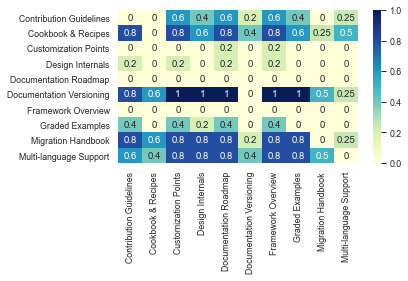

In [7]:
contribution_guidelines = [0.0, 0.0, 0.6, 0.4, 0.6, 0.2, 0.6, 0.4, 0.0, 0.25]
cookbook_and_recipes = [0.8, 0.0, 0.8, 0.6, 0.8, 0.4, 0.8, 0.6, 0.25, 0.5]
customization_points = [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0]
design_internals = [0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0]
documentation_roadmap = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
documentation_versioning = [0.8, 0.6, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.5, 0.25]
framework_overview = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
graded_examples = [0.4, 0.0, 0.4, 0.2, 0.4, 0.0, 0.4, 0.0, 0.0, 0.0]
migration_handbook = [0.8, 0.6, 0.8, 0.8, 0.8, 0.2, 0.8, 0.8, 0.0, 0.25]
multi_language_support = [0.6, 0.4, 0.8, 0.8, 0.8, 0.4, 0.8, 0.8, 0.5, 0.0]

df = pd.DataFrame({"Contribution Guidelines": contribution_guidelines, "Cookbook & Recipes": cookbook_and_recipes, "Customization Points": customization_points, "Design Internals": design_internals, "Documentation Roadmap": documentation_roadmap, "Documentation Versioning": documentation_versioning, "Framework Overview": framework_overview, "Graded Examples": graded_examples, "Migration Handbook": migration_handbook, "Multi-language Support": multi_language_support})

pt = ["Contribution Guidelines", "Cookbook & Recipes", "Customization Points", "Design Internals", "Documentation Roadmap", "Documentation Versioning", "Framework Overview", "Graded Examples", "Migration Handbook", "Multi-language Support"]
df.index = pt

sns.set(context="paper", palette="muted", style="whitegrid", font='sans-serif')

g = sns.heatmap(df.T, annot=True, cmap="YlGnBu")

g.figure.tight_layout()
g.figure.savefig(f'../../figures/pattern_adoption/conditional_probability.pdf', format='pdf', bbox_inches="tight")